**Задания проекта**

1. Выберите метод, который предположительно подойдет в первом вопросе.

2. Проверьте, являются ли дисперсии внутри групп гомогенными.

3. Проведите тест на нормальность распределения.

4. Сравните средние в представленных группах.

5. Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

6. Примите решение: какие картинки в итоге будем использовать?

7. Выберите метод для второго теста.

8. Визуализируйте распределение events для контрольной и тестовой групп. 

9. Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. 

10. Выберите формулу для модели, проведите тест.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(16,6)}, style = 'whitegrid')

import scipy.stats as st
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
import pingouin as pg

**Задание 1.** Выберите метод, который предположительно подойдет в первом вопросе.

*В предложенных данных для сравнения средних оптимальнее выбрать статистический тест ANOVA.*

In [2]:
df_1 = pd.read_csv('~/Statistics/5_task_1.csv')
df_1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


**Задание 2.** Проверьте, являются ли дисперсии внутри групп гомогенными.

*С помощью теста Левена проверяем, являются ли дисперсии внутри групп одинаковыми.*

In [17]:
pg.homoscedasticity(data = df_1, dv = 'events', group = 'group')

,W,pval,equal_var
levene,2.26226,0.104133,True


*p-value > 0.05, не отклоняем нулевую гипотезу*

**Задание 3.** Проведите тест на нормальность распределения.

In [18]:
pg.normality(data = df_1, dv = 'events', group = 'group', method = 'normaltest')

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


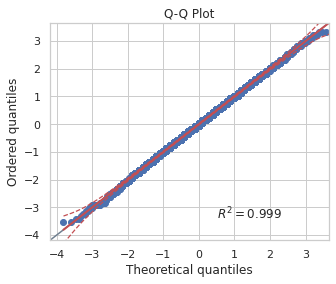

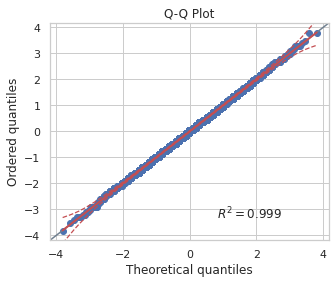

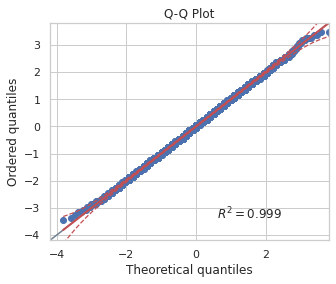

In [5]:
pg.qqplot(df_1.query('group == "A"').events)
pg.qqplot(df_1.query('group == "B"').events)
pg.qqplot(df_1.query('group == "C"').events)

*Распределение events во всех группах является нормальным.*

**Задание 4.** Сравните средние в представленных группах.

*Для сравнения средних я использую однофакторный дисперсионный анализ.*

In [6]:
st.f_oneway(df_1.query('group == "A"').events,
            df_1.query('group == "B"').events,
            df_1.query('group == "C"').events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [7]:
pg.anova(data = df_1, dv = 'events', between = 'group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


*Значение статистики равно 2886, а р-уровень значимости составил 0.0*

**Задание 5.** Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

In [8]:
MultiComp = MultiComparison(df_1['events'], groups = df_1['group'])

MultiComp.tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


Text(0, 0.5, 'Число покупок')

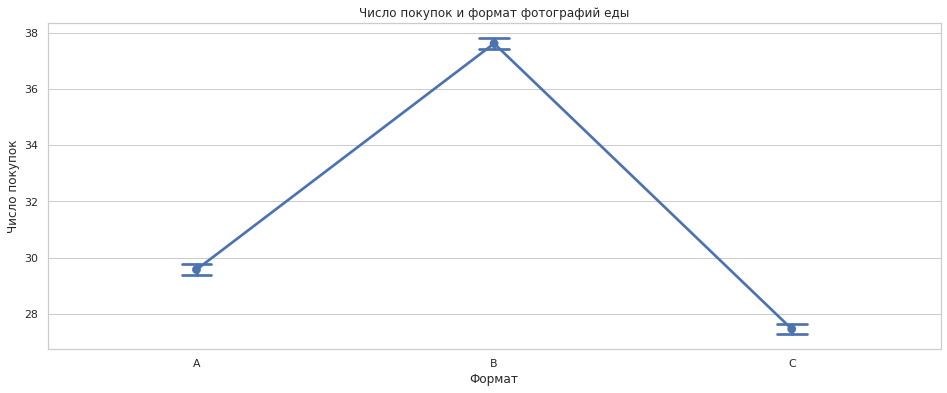

In [9]:
sns.pointplot(x = 'group', y = 'events', data = df_1, capsize = .1)
plt.title('Число покупок и формат фотографий еды')
plt.xlabel('Формат')
plt.ylabel('Число покупок')

In [10]:
pg.pairwise_tukey(data = df_1, dv = 'events', between = 'group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


*Cтатистически значимые различия наблюдаются между всеми группамию*

**Задание 6.** Примите решение: какие картинки в итоге будем использовать?

*Оптимальнее всего выбрать квадратные изображения*

**Задание 7.** Выберите метод для второго теста.

*В данном случае логичнее использовать многофакторный дисперсионный анализ*

In [11]:
df_2 = pd.read_csv('~/Statistics/5_task_2.csv')
df_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


**Задание 8.** Визуализируйте распределение events для контрольной и тестовой групп. 

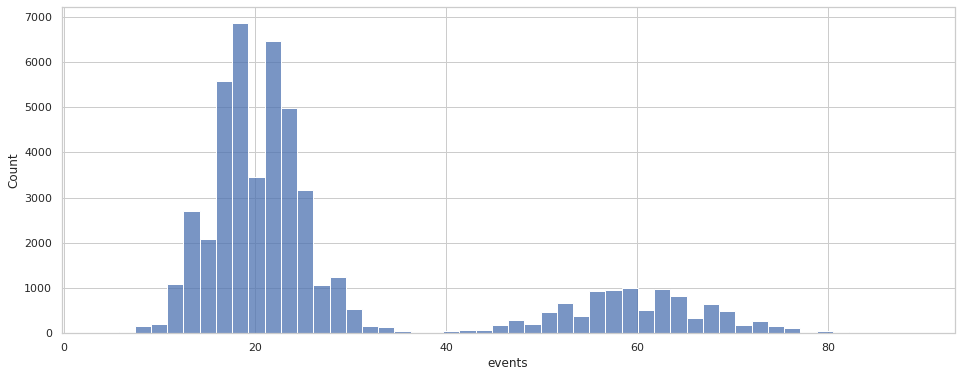

In [12]:
sns.histplot(x = df_2.query('group == "control"').events, bins = 50)

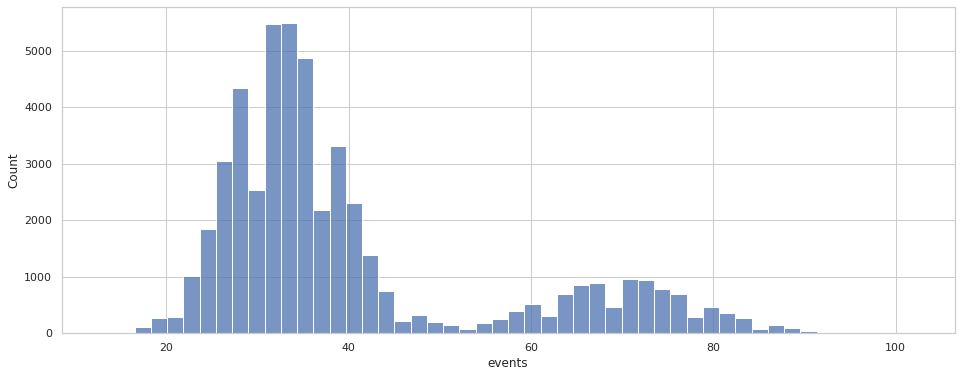

In [13]:
sns.histplot(x = df_2.query('group == "test"').events, bins = 50)

**Задание 9.** Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. 

In [14]:
df_2.groupby(['segment', 'group'])['events'].describe().T.round(2)

segment      high                 low          
group     control      test   control      test
count    10000.00  10000.00  40000.00  40000.00
mean        59.97     69.94     20.03     33.03
std          7.81      8.40      4.47      5.72
min         31.00     40.00      4.00     13.00
25%         55.00     64.00     17.00     29.00
50%         60.00     70.00     20.00     33.00
75%         65.00     76.00     23.00     37.00
max         89.00    102.00     41.00     59.00

**Задание 10.** Выберите формулу для модели, проведите тест.

*Формула: events ~ segment + group + segment:group*

In [15]:
model = smf.ols(formula = 'events ~ segment + group + segment:group', data = df_2).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
segment,1.0,2.362480e+07,2.362480e+07,689756.377484,0.000000e+00
group,1.0,3.837195e+06,3.837195e+06,112031.864119,0.000000e+00
segment:group,1.0,3.664244e+04,3.664244e+04,1069.823273,2.060261e-233
Residual,99996.0,3.424956e+06,3.425093e+01,NaN,NaN


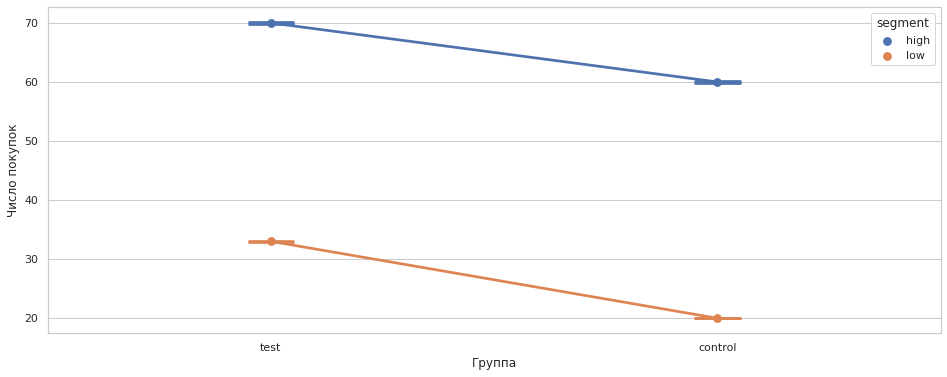

In [16]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = df_2, capsize = .1)
plt.xlabel('Группа')
plt.ylabel('Число покупок')
plt.show()

*Фактор group оказался значимым, фактор segment – значимым, их взаимодействие – значимо.*

*Судя по графику, для всех групп среднее значение events увеличилось, поэтому решение:* **выкатываем новую версию.**